In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import math

In [17]:
deg = 12
x, w = np.polynomial.legendre.leggauss(deg)

for i in range(deg):
    print(x[i],w[i])

(-0.9815606342467192, 0.04717533638651202)
(-0.9041172563704748, 0.10693932599531888)
(-0.7699026741943047, 0.1600783285433461)
(-0.5873179542866175, 0.20316742672306565)
(-0.3678314989981802, 0.23349253653835464)
(-0.1252334085114689, 0.2491470458134027)
(0.1252334085114689, 0.2491470458134027)
(0.3678314989981802, 0.23349253653835464)
(0.5873179542866175, 0.20316742672306565)
(0.7699026741943047, 0.1600783285433461)
(0.9041172563704748, 0.10693932599531888)
(0.9815606342467192, 0.04717533638651202)


In [18]:
a = 0
b = 0.5*np.pi

In [19]:
f = lambda x: np.sin(x)
print(f(0.))

0.0


In [20]:
t = 0.5* ( (b-a)*x + a + b  )

Integral = 0.5*(b-a)*sum( w*f(t) )

In [28]:
print(Integral)

0.9999999999999999


# Vamos a usar Simpy

In [29]:
import sympy as sym

In [30]:
x = sym.Symbol('x',Real=True)
F = sym.sin(3*x)*sym.exp(-0.5*x)
print(F)

exp(-0.5*x)*sin(3*x)


In [31]:
f = sym.lambdify([x],F,'numpy')

In [32]:
x = np.linspace(0,2*np.pi,100)
y = f(x)

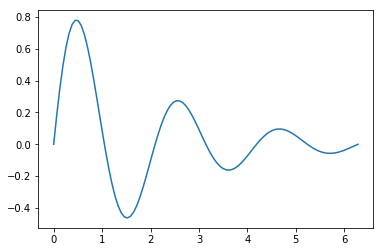

In [33]:
plt.plot(x,y)

In [34]:
# Haciendo una integral

x1 = sym.Symbol('x',Real=True)
y1 = sym.Symbol('y',Real=True)

F = sym.exp( -(x1**2+y1**2) )
print(F)

exp(-x**2 - y**2)


In [35]:
sym.integrate(F, (x1, -sym.oo, sym.oo),(y1, -sym.oo, sym.oo))

pi

In [37]:
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)

Grid = sym.lambdify([x1,y1],F,'numpy')

In [38]:
X, Y = np.meshgrid(x,y)

In [39]:
Z = Grid(X,Y)

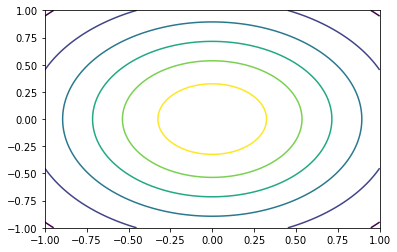

In [40]:
plt.contour(X,Y,Z)

<IPython.core.display.Javascript object>


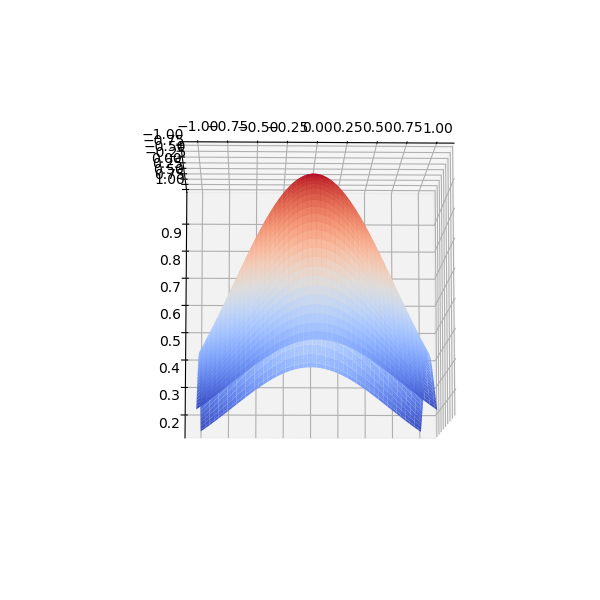

In [42]:
%matplotlib notebook
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection = '3d', elev = 24, azim = -40)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0)

# Crear polinomios de LEGENDRE

In [46]:
def CreatePoly(n):
    
    x = sym.Symbol('x',real=True)
    y = sym.Symbol('y',real=True)
    
    y = (x**2-1)**n
    
    poly = sym.diff(y,x,n)/(2**n * math.factorial(n))
    
    return poly

In [47]:
Legendre = []

for i in range(10):
    
    Legendre.append(CreatePoly(i))

In [48]:
for i in Legendre:
    print(i)

1
x
(3*x**2 - 1)/2
x*(5*x**2 - 3)/2
(8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8
x*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8
(16*x**6 + 120*x**4*(x**2 - 1) + 90*x**2*(x**2 - 1)**2 + 5*(x**2 - 1)**3)/16
x*(16*x**6 + 168*x**4*(x**2 - 1) + 210*x**2*(x**2 - 1)**2 + 35*(x**2 - 1)**3)/16
(128*x**8 + 1792*x**6*(x**2 - 1) + 3360*x**4*(x**2 - 1)**2 + 1120*x**2*(x**2 - 1)**3 + 35*(x**2 - 1)**4)/128
x*(128*x**8 + 2304*x**6*(x**2 - 1) + 6048*x**4*(x**2 - 1)**2 + 3360*x**2*(x**2 - 1)**3 + 315*(x**2 - 1)**4)/128
